<a href="https://colab.research.google.com/github/ambideXtrous9/Machine-Learning-Assignments/blob/main/214161006_214161011_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 527 Machine Learning Lab
# Assignment 04
-----------------------------------------
214161006 Pathak Sanchit Vivekanand

214161011 Sushovan Saha

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Q1. Randomly generate n=1000 2D points, $S_{e} = \{x_{1}, x_{2}, x_{3},..., x_{n}\}$ inside a 2D ellipse of axes $r_{x}=150, r_{y}=100$ and centered at $x_{𝒄}= (-10,20)$ The axes of ellipse are aligned with the co-ordinate system axes.

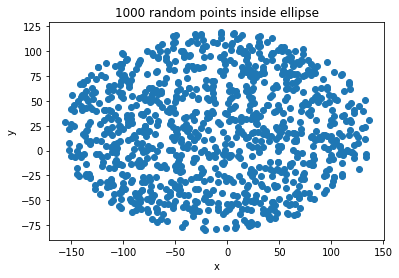

In [ ]:
rx = 150
ry = 100
h = -10
k = 20
n = 1000

#first define parameters required for parametric equations
r = np.sqrt(np.random.uniform(size=(n)))
th = 2*np.pi*np.random.uniform(size=(n))

#Using parametric equations for ellipse
x = h + rx*r*np.cos(th)
y = k + ry*r*np.sin(th)

#Generated Set as required in Question
Se = np.column_stack([x,y])

plt.figure()
plt.scatter(Se[:,0],Se[:,1])
plt.title(str(n) + " random points inside ellipse")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Q2. Randomly generate n=1000 2D points, $S_{hs} = \{x_{1}, x_{2}, x_{3},..., x_{n}\}$ inside a 10 Dimensional hypershere of radius r=100, centered at $x_{c} = (-1,2,-1,0,0,0,3,4,9,0)$

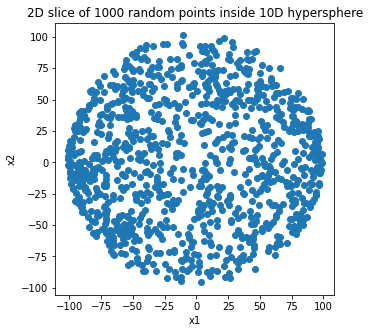

In [ ]:
n = 1000
R = 100
c = np.array([-1, 2, -1, 0, 0, 0, 3, 4, 9, 0])
dim = c.shape[0]

#generate random points from x1 to x9
x1 = np.random.uniform(-R, R, size=(n))
xsq = x1**2
p = np.sqrt(R**2 - xsq)
xnext = np.array([np.random.uniform(-i, i) for i in p])
x1 = np.column_stack([x1, xnext])

for i in range(3,dim+1):
  xsq = np.sum(x1**2, axis=1, keepdims=True)
  p = np.sqrt(R**2 - xsq)
  xnext = np.array([np.random.uniform(-i, i) for i in p])
  x1 = np.column_stack([x1, xnext])

##Generated Set as required in Question by merging x1_9 with x10
Shs = x1 + c

#Plotting 2-D slice of the hypershere
plt.figure(figsize=(5,5))
plt.scatter(Shs[:,0], Shs[:,1])
plt.title("2D slice of " + str(n) + " random points inside 10D hypersphere")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Q3. Randomly generate n=1000 2D points, $S_{e} = \{x_{1}, x_{2}, x_{3},..., x_{n}\}$ inside a 2D ellipse of axes $r_{x}=150, r_{y}=100$ and centered at $x_{𝒄}= (-10,20)$ The major axis of ellipse makes an angle of $\theta = \frac{\pi}{3}$ with the horizontal axis $\hat{X}$.

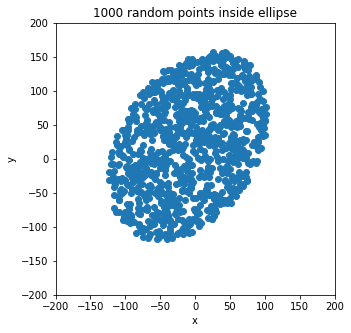

In [ ]:
def generate_rotated_ellipse(rx=150, ry=100, h=-10, k=20, n=1000, alpha=np.pi/3):
  
  #first define parameters required for parametric equations
  r = np.sqrt(np.random.uniform(size=(n)))
  th = 2*np.pi*np.random.uniform(size=(n))

  #Using parametric equations for ellipse
  x = h + r*(rx*np.cos(th)*np.cos(alpha) - ry*np.sin(th)*np.sin(alpha))
  y = k + r*(rx*np.cos(th)*np.sin(alpha) + ry*np.sin(th)*np.cos(alpha))

  #Generated Set as required in Question
  Seo = np.column_stack([x,y])
  return Seo

Seo = generate_rotated_ellipse()

plt.figure(figsize=(5,5))
plt.scatter(Seo[:,0], Seo[:,1])
plt.title(str(n) + " random points inside ellipse")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.show()

## Q4. Compute the 2x2 Covariance Matrix C using the points in $S_{eo}$. Plot the Eigen Vectors $(\hat{e_{1}}, \hat{e_{2}})$ of C and the axes of the oriented ellipse, all originating from the center $x_{c}$. The lengths of $(\hat{e_{1}}, \hat{e_{2}})$ should be respectively set to $(k\sqrt{\lambda_{1}}, k\sqrt{\lambda_{2}})$. Change the value of n and report observations. Try plotting with k = 3,4,5.

In [ ]:
def ques_4(rx=150, ry=100, h=-10, k=20, n=1000, K=3, alpha = np.pi/3):

  #generate rotated ellipse of 'n' random points
  Seo = generate_rotated_ellipse(n=n, rx=rx, ry=ry, h=h, k=k)

  #find covariance matrix C
  C = np.cov(Seo.T)
  print("C = ",C, sep='\n')
  evalue, evector = np.linalg.eig(C)
  print("Normalized Eigen Vectors = ", evector, sep='\n')
  
  x_mjr1 = h + rx*np.cos(alpha)
  y_mjr1 = k + rx*np.sin(alpha)

  x_mnr1 = h - ry*np.sin(alpha)
  y_mnr1 = k + ry*np.cos(alpha)

  x_mjr2 = h - rx*np.cos(alpha)
  y_mjr2 = k - rx*np.sin(alpha)

  x_mnr2 = h + ry*np.sin(alpha)
  y_mnr2 = k - ry*np.cos(alpha)

  plt.figure(figsize=(5,5))
  plt.grid()
  #plot Seo points
  plt.scatter(Seo[:,0], Seo[:,1], color = 'sandybrown', label="datapoints")
  #plot major & minor axes
  plt.plot([h, x_mjr1], [k, y_mjr1], color = 'black', label = "major axis")
  plt.plot([h, x_mnr1], [k, y_mnr1], color = 'dimgrey', label = "minor axis")
  plt.plot([h, x_mjr2], [k, y_mjr2], color = 'black')
  plt.plot([h, x_mnr2], [k, y_mnr2], color = 'dimgrey')
  #mark the center
  plt.plot(h,k, color = "black", marker=".", markersize=10)
  #plot eigenvectors
  plt.arrow(h, k, K*(evalue[0]**0.5)*evector[0,0], K*(evalue[0]**0.5)*evector[1,0], color='red', head_width=10, label = "e1")
  plt.arrow(h, k, K*(evalue[1]**0.5)*evector[0,1], K*(evalue[1]**0.5)*evector[1,1], color='blue', label = "e2", head_width=10)

  plt.title("K = " + str(K))
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim([-400, 400])
  plt.ylim([-400, 400])
  plt.legend(loc="best")
  plt.show()

-----------------k = 3-----------------
C = 
[[3420.74549661 1392.21618707]
 [1392.21618707 4560.74930339]]
Normalized Eigen Vectors = 
[[-0.8303295  -0.55727276]
 [ 0.55727276 -0.8303295 ]]


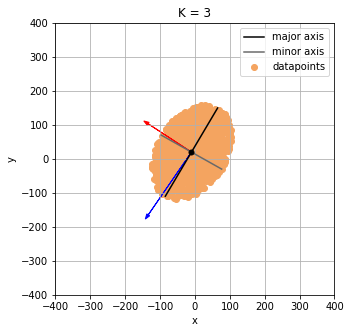

-----------------k = 4-----------------
C = 
[[3055.59255744 1283.53711409]
 [1283.53711409 5016.05502726]]
Normalized Eigen Vectors = 
[[-0.89636577 -0.44331525]
 [ 0.44331525 -0.89636577]]


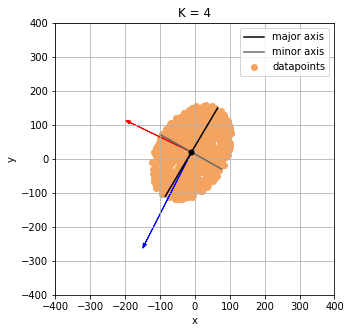

-----------------k = 5-----------------
C = 
[[3214.52288212 1331.55417958]
 [1331.55417958 4789.14812505]]
Normalized Eigen Vectors = 
[[-0.86860859 -0.49549886]
 [ 0.49549886 -0.86860859]]


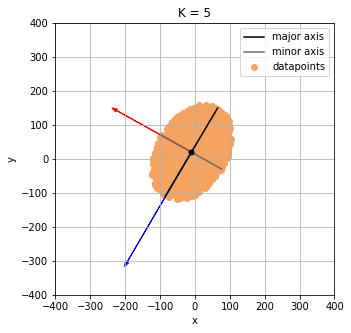

In [ ]:
#For n = 1000
print("-----------------k = 3-----------------")
ques_4(n=1000, K=3)
print("-----------------k = 4-----------------")
ques_4(n=1000, K=4)
print("-----------------k = 5-----------------")
ques_4(n=1000, K=5)

-----------------k = 3-----------------
C = 
[[3318.26678919 1366.52227742]
 [1366.52227742 4841.07929963]]
Normalized Eigen Vectors = 
[[-0.86218632 -0.5065913 ]
 [ 0.5065913  -0.86218632]]


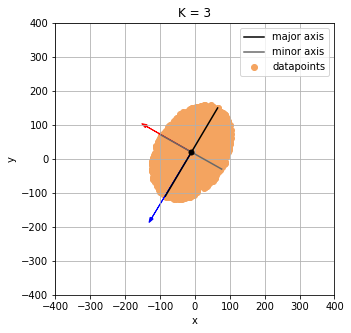

-----------------k = 4-----------------
C = 
[[3265.0450039  1215.38025659]
 [1215.38025659 4737.49310333]]
Normalized Eigen Vectors = 
[[-0.87123798 -0.49086085]
 [ 0.49086085 -0.87123798]]


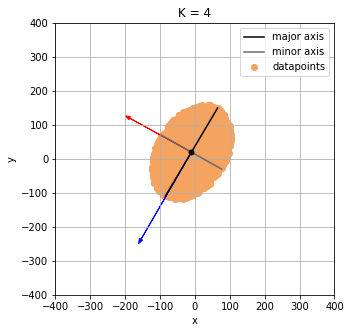

-----------------k = 5-----------------
C = 
[[3318.83776468 1408.18319871]
 [1408.18319871 4883.55854902]]
Normalized Eigen Vectors = 
[[-0.86187592 -0.50711922]
 [ 0.50711922 -0.86187592]]


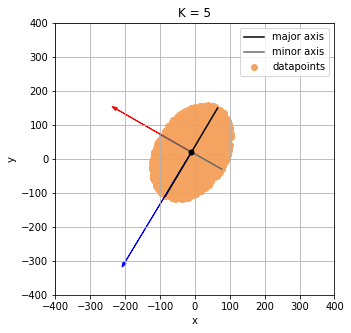

In [ ]:
#For n = 2000
print("-----------------k = 3-----------------")
ques_4(n=2000, K=3)
print("-----------------k = 4-----------------")
ques_4(n=2000, K=4)
print("-----------------k = 5-----------------")
ques_4(n=2000, K=5)


### As the value of n (datapoints) increases, the eigen vectors better align with the major and minor axes.

### As the value of K increases, the length of eigen vector increases.

### For K=2, the length of eigen vectors becomes almost equal to resp. major & minor axes

## Q5. Generate n = 5000 numbers $S = \{x_{1}, x_{2}, x_{3},..., x_{n}\}$ between $x_{min} = -750$ and $x_{max} = 750$. Estimate the distribution (p.m.f.) $\hat{P}$ from this dataset by using a bin-size of $b_{s} = 5$.

1.0


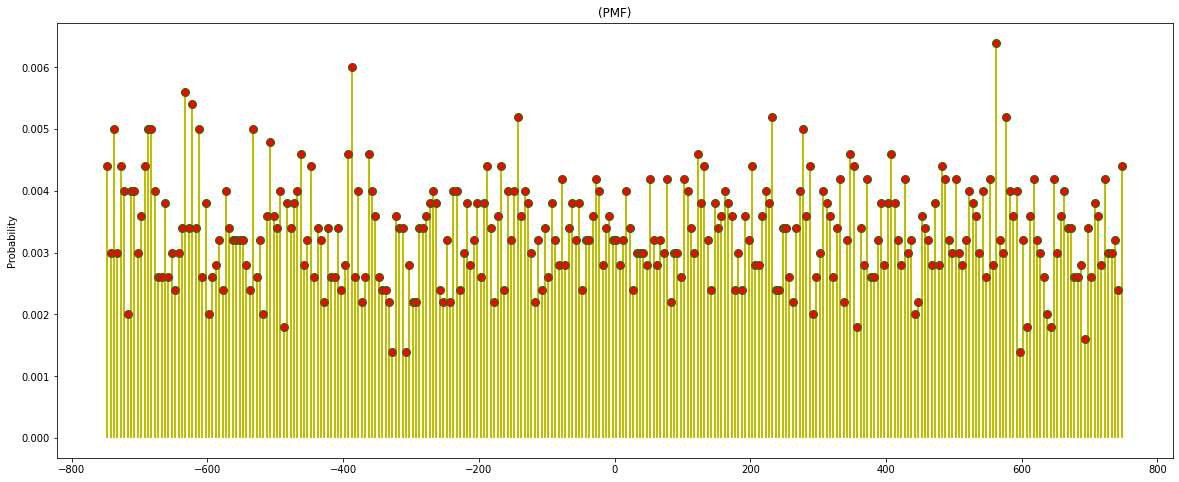

In [ ]:
xmin = -750
xmax = 750
n = 5000
bin_size = 5

S =  np.random.randint(low=xmin, high=xmax, size=(n))

total_bins = np.arange(xmin,xmax+bin_size,bin_size)
hist,bins = np.histogram(S,bins = total_bins) 

probP = hist/len(S)
bin_rep = total_bins+(bin_size/2)
bin_rep = bin_rep[:-1]

print(np.sum(probP))

fig, ax = plt.subplots(1, 1,figsize=(20,8))
ax.plot(bin_rep, probP, 'ro', ms=8, mec='g')
ax.vlines(bin_rep, 0, probP, colors='y', linestyles='-', lw=2)
plt.title('(PMF)')
plt.ylabel('Probability')
plt.show()

## Q6. Generate n' = 5000 numbers $S' = \{x'_{1}, x'_{2}, x'_{3},..., x'_{n}\}$ between $x_{min} = -750$ and $x_{max} = 750$ by using the distribution (p.m.f.) $\hat{P}$. Estimate the distribution (p.m.f.) $\hat{Q}$ from S' by using a bin-size of $b_{s} = 5$.

In [ ]:
p = np.random.uniform(0,1,3000)
cumulative_prob = np.cumsum(probP)
cumulative_prob = np.insert(cumulative_prob, 0, 0)

print(len(cumulative_prob))

print(np.max(p))
print(np.min(p))

301
0.9999007483556386
0.0001279241022558164


In [ ]:
def binary_search(arr,X,p):
  left = 0
  right = len(arr)-1
  position = -1
  while left <= right:
    middle = int((left + right) / 2)
    if(arr[middle]<=p): 
      position = middle
      left = middle + 1
    else: 
      right = middle-1
  return arr[position],arr[position+1],X[position]

In [ ]:
n1 = 3000

Q_points = []
for i in range(0,n1):
  S1,S2,x1 = binary_search(cumulative_prob,bin_rep,p[i])
  #print("p = {}, S1 = {}, S2 = {}, X = {}".format(p[i],S1,S2,x1))
  pr1 = S2-S1
  X = ((p[i]-S1)/pr1)*bin_size + x1
  Q_points.append(X)

1.0


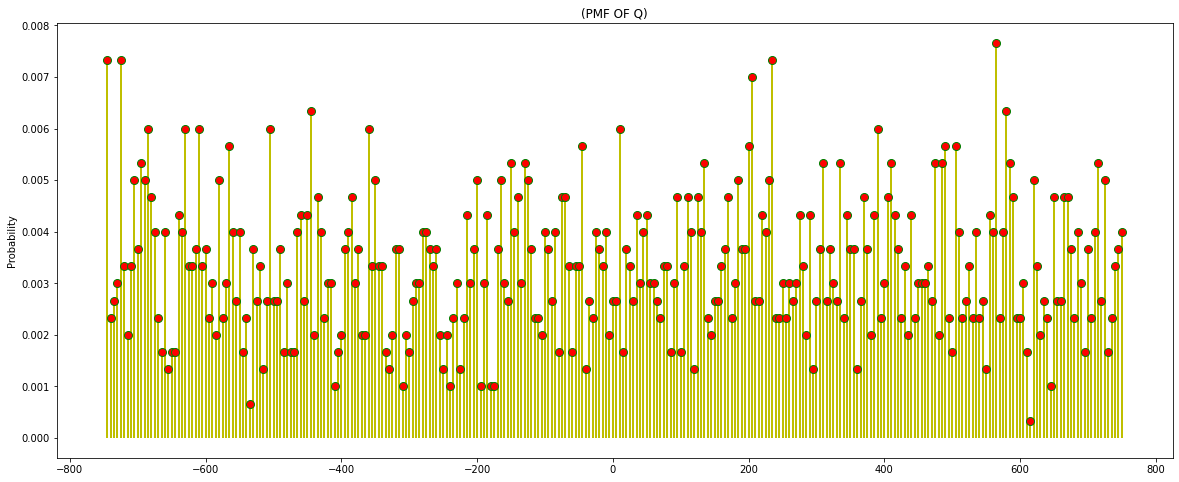

In [ ]:
xmin = np.min(Q_points)
xmax = np.max(Q_points)

total_bins = np.arange(xmin,xmax+bin_size,bin_size)
hist,bins = np.histogram(Q_points,bins = total_bins) 

probQ = hist/len(Q_points)
bin_rep = total_bins+(bin_size/2)
bin_rep = bin_rep[:-1]

print(np.sum(probQ))

fig, ax = plt.subplots(1, 1,figsize=(20,8))
ax.plot(bin_rep, probQ, 'ro', ms=8, mec='g')
ax.vlines(bin_rep, 0, probQ, colors='y', linestyles='-', lw=2)
plt.title('(PMF OF Q)')
plt.ylabel('Probability')
plt.show()

## Q7. Compute the Similarity between Distributions $\hat{P}$ and $\hat{Q}$ by using the Bhattacharya Coefficient BC($\hat{P}$,$\hat{Q}$).

## BC($\hat{P}$,$\hat{Q}$) = $\sum_{k=1}^{m} \sqrt{\hat{P}[k]\hat{Q}[k]}$

## Experiment with different values of n, n' and $b_{s}$ $(n\ge n')$

## Report the different values of BC($\hat{P}$,$\hat{Q}$).

In [ ]:
BC = np.sum(np.sqrt(np.multiply(probP,probQ)))
print(BC)

0.9866436004698089


In [ ]:
def bhattacharya_coef(nP,n1Q,bs):
  np.random.seed(3)
  xmin = -750
  xmax = 750
  n = nP
  n1 = n1Q
  bin_size = bs

  S =  np.random.randint(low=xmin, high=xmax, size=(n))

  total_bins = np.arange(xmin,xmax+bin_size,bin_size)

  hist,bins = np.histogram(S,bins = total_bins) 

  probP = hist/len(S)
  bin_rep = total_bins+(bin_size/2)
  bin_rep = bin_rep[:-1]

  p = np.random.uniform(0,1,n1)
  cumulative_prob = np.cumsum(probP)

  Q_points = []
  for i in range(0,n1):
    S1,S2,x1 = binary_search(cumulative_prob,bin_rep,p[i])
    #print("p = {}, S1 = {}, S2 = {}, X = {}".format(p[i],S1,S2,x1))
    pr1 = S2-S1
    X = ((p[i]-S1)/pr1)*bin_size + x1
    Q_points.append(X)

  xmin = np.min(Q_points)
  xmax = np.max(Q_points)

  total_bins = np.arange(xmin,xmax+bin_size,bin_size)
  hist,bins = np.histogram(Q_points,bins = total_bins) 

  probQ = hist/len(Q_points)
  return np.sum(np.sqrt(np.multiply(probP,probQ)))

In [ ]:
print(bhattacharya_coef(5000,3000,5))
print(bhattacharya_coef(4000,5000,8))
print(bhattacharya_coef(6000,2000,7))
print(bhattacharya_coef(1000,2000,8))
print(bhattacharya_coef(8000,1000,10))
print(bhattacharya_coef(4000,8000,8))

0.9740293456140371
0.9833273525151128
0.978108309782435
0.9347350413557903
0.9681792890886387
0.9850203862978453
